## Importing libraries 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
## Importing Data

In [3]:
# Defining path
path = r'C:\Users\mauri\OneDrive\Documentos\Instacart Basket Analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_final.pkl'))

In [5]:
# Checking dataframe
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,dependents,marital_status,income,department
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages


In [6]:
df.shape

(32404859, 32)

## Consider any security implications that might exist (PII)

In [7]:
#Checking columns to identify PII 
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'order_frequency', 'order_frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'dependents', 'marital_status', 'income', 'department'],
      dtype='object')

In [8]:
#Dropping first_name and last_name columns
df = df.drop(columns=['first_name', 'last_name'])

In [9]:
#Checking column drop
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'order_frequency', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'dependents', 'marital_status', 'income',
       'department'],
      dtype='object')

## Creating Regions columns: Northeast, Midwest, South, West

In [10]:
#Creating region lists

northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [11]:
# Creating regional flag column

df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(south), 'region'] = 'South'
df.loc[df['state'].isin(west), 'region'] = 'West'

In [12]:
# checking result 
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
df.shape

(32404859, 31)

In [14]:
#Creating a crosstab to compare region and spending flag
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [15]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [16]:
# Getting percentage 
pd.crosstab(df['region'], df['spending_flag'], normalize = 'columns', dropna = False)

spending_flag,High spender,Low spender
region,,
Midwest,0.245922,0.234221
Northeast,0.170636,0.176720
South,0.330615,0.333081
West,0.252827,0.255977


###### The south has the highest concentration of costumers and also has he highest number of high spender customer, making this a great market to replicate, taking in consideration that the northeast region has the least concentration of constumers and least amount of high spender this would be the best market to target and apply a customer growth plan 

In [17]:
df['spending_flag'].value_counts()

Low spender     31770614
High spender      634245
Name: spending_flag, dtype: int64

## Create an exclusion flag for low-activity customers (customers with less than 5 orders) 

In [18]:
#Creating exclusion flag for low-activity customers: less than 5 and equal to or more than 5

df.loc[df['max_order'] >=5, 'activity'] ='high_activity'
df.loc[df['max_order'] <5, 'activity'] ='low_activity'

In [19]:
df['activity'].value_counts(dropna=False)

high_activity    30964564
low_activity      1440295
Name: activity, dtype: int64

In [20]:
#Creating a dataset of customers with orders lower than 5
low_activity = df[df['activity'] =='low_activity']

In [21]:
low_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,dependents,marital_status,income,department,region,activity
282,520620,120,1,3,11,NaN,True,196.0,2.0,0.0,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,low_activity
283,3273029,120,3,2,8,19.0,False,196.0,2.0,1.0,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,low_activity
284,520620,120,1,3,11,NaN,True,46149.0,1.0,0.0,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,low_activity
285,3273029,120,3,2,8,19.0,False,46149.0,1.0,1.0,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,low_activity
286,906054,120,2,4,7,15.0,False,31102.0,1.0,0.0,...,Female,Kentucky,54,3/2/2017,2,married,99219,beverages,South,low_activity


In [22]:
#Exporting dataframe of low_activity customers
low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

In [23]:
# Creating a dataframe of customers
df2 = df[df['activity'] == 'high_activity']

In [24]:
# Checking new dataframe
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,dependents,marital_status,income,department,region,activity
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,high_activity
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,high_activity
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,high_activity
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,high_activity
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,high_activity


## Creating Customer Profiles, agregations and visualization

### Age profiling 

In [25]:
# Creating age column
df2.loc[df2['age']<=25, 'age_group']='Young Adult'
df2.loc[(df2['age']<65)&(df2['age']>25), 'age_group']='Adult'
df2.loc[df2['age']>=65, 'age_group']='Senior'

C:\Users\mauri\AppData\Local\Temp\ipykernel_17500\1834271529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['age']<=25, 'age_group']='Young Adult'


In [26]:
# Checking new column
df2['age_group'].value_counts()

Adult          18904502
Senior          8195544
Young Adult     3864518
Name: age_group, dtype: int64

In [27]:
# Aggregate for age group usage frequency
df2.groupby('age_group').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                       mean  min   max
age_group                             
Adult              9.971613  0.0  30.0
Senior             9.933025  0.0  30.0
Young Adult        9.937482  0.0  30.0

In [28]:
# Aggregate for age group expenditure
df2.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.789100  1.0  25.0
Senior       7.796715  1.0  25.0
Young Adult  7.784889  1.0  25.0

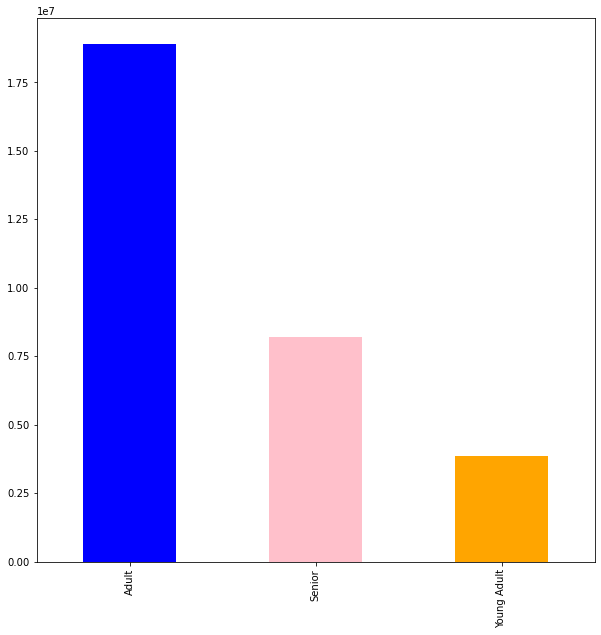

In [29]:
# Age profiles visualization
age_bar=df2['age_group'].value_counts().plot.bar(figsize=(10,10), color =['Blue', 'Pink', 'Orange'])

In [30]:
# Export Bar Chart
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_bar.png'))

### Income profiling

In [31]:
#Creating income flags:
df2.loc[df2['income']<50000, 'income_group'] = 'low income'
df2.loc[(df2['income']>=50000) & (df2['income']<150000), 'income_group'] = 'middle income'
df2.loc[df2['income']>150000, 'income_group'] = 'high income' 

C:\Users\mauri\AppData\Local\Temp\ipykernel_17500\4284667814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['income']<50000, 'income_group'] = 'low income'


In [32]:
df2['income_group'].value_counts() 

middle income    23706735
high income       3894534
low income        3362554
Name: income_group, dtype: int64

In [33]:
# Aggregating for income group order frequency
df2.groupby('income_group').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                         mean  min   max
income_group                            
high income          9.789454  0.0  30.0
low income          10.519268  0.0  30.0
middle income        9.904953  0.0  30.0

In [34]:
# Aggregating for income group expenditure
df2.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
high income    7.940855  1.0  25.0
low income     6.707347  1.0  25.0
middle income  7.919593  1.0  25.0

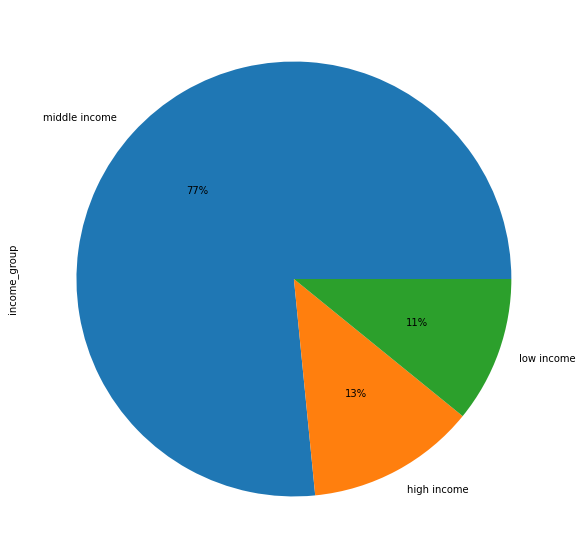

In [35]:
# Income profile visualization
income_pie = df2['income_group'].value_counts().plot.pie(figsize=(10,10), autopct=('%1.f%%')) 

In [36]:
# Export pie chart
income_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_pie.png'))

### Products profiling 

In [37]:
# Creating Alcohol flags:
df2.loc[df2['department'] == 'alcohol', 'alcohol_consumer'] = 'Yes'
df2.loc[df2['department'] != 'alcohol',  'alcohol_consumer'] = 'No'

C:\Users\mauri\AppData\Local\Temp\ipykernel_17500\3843180425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['department'] == 'alcohol', 'alcohol_consumer'] = 'Yes'


In [38]:
df2['alcohol_consumer'].value_counts()

No     30819937
Yes      144627
Name: alcohol_consumer, dtype: int64

In [39]:
# Aggregate for age group usage frequency
df2.groupby('alcohol_consumer').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                            mean  min   max
alcohol_consumer                           
No                      9.959101  0.0  30.0
Yes                     9.539322  0.0  30.0

In [40]:
# Aggregating for income group expenditure
df2.groupby('alcohol_consumer').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
alcohol_consumer                     
No                7.788900  1.0  25.0
Yes               8.150699  1.0  15.0

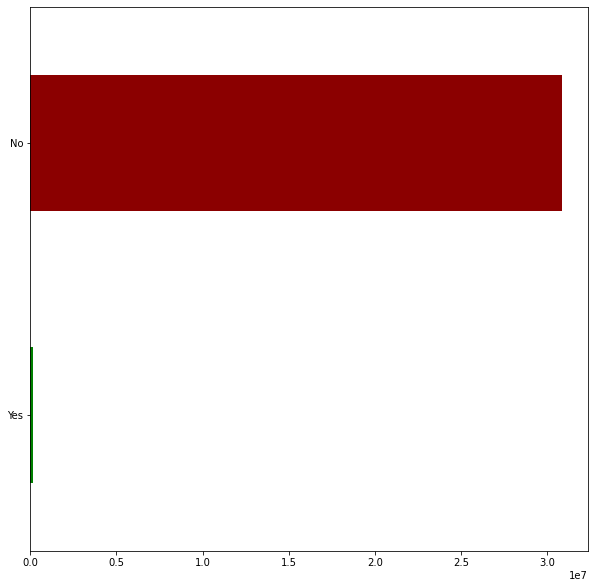

In [41]:
alcohol_barh = df2['alcohol_consumer'].value_counts().sort_values().plot.barh(figsize=(10,10), color =['green', 'darkred'])

#### This graphic show us that the vast majority of customers do not consume or buy alcohol through instacart and the alcohol buyers are less than 1% of the customers 

In [42]:
# Export bar chart
alcohol_barh.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_barh.png'))

### Dependants profifling 

In [43]:
df2.loc[df2['dependents'] <= 1, 'family_size'] = 'small family'
df2.loc[df2['dependents'] == 2, 'family_size'] = 'medium family'
df2.loc[df2['dependents'] >= 3, 'family_size'] = 'big family' 

C:\Users\mauri\AppData\Local\Temp\ipykernel_17500\3976261672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['dependents'] <= 1, 'family_size'] = 'small family'


In [44]:
df2['family_size'].value_counts()

small family     15458787
big family        7772516
medium family     7733261
Name: family_size, dtype: int64

In [45]:
# Aggregate for age group usage frequency
df2.groupby('family_size').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                         mean  min   max
family_size                             
big family           9.949826  0.0  30.0
medium family        9.972207  0.0  30.0
small family         9.953280  0.0  30.0

In [46]:
# Aggregating for income group expenditure
df2.groupby('family_size').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
family_size                       
big family     7.792886  1.0  25.0
medium family  7.784014  1.0  25.0
small family   7.792726  1.0  25.0

Text(0.5, 1.0, 'Family Size')

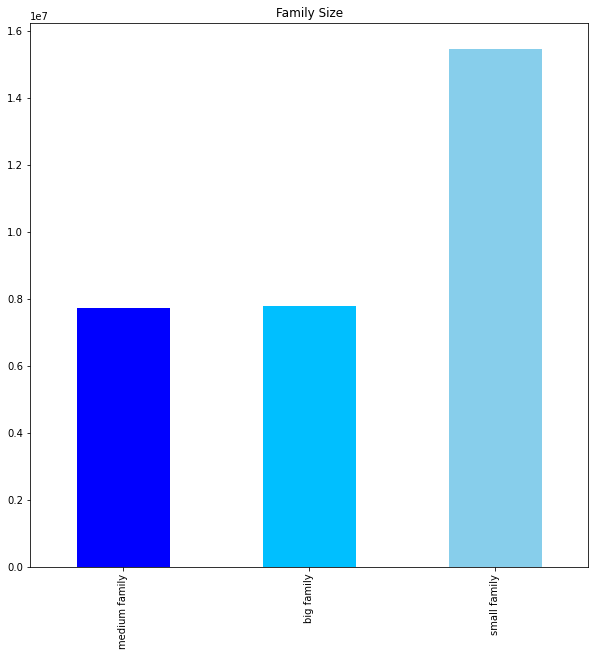

In [47]:
fam_bar = df2['family_size'].value_counts().sort_values().plot.bar(color = ['blue', 'deepskyblue', 'skyblue'], figsize = (10,10))
plt.title('Family Size')

#### the amount of small families that uses instacart doubles the amouont of big and medium size families, because of this targeting this group with smaller size packages would be the best way to increase product sales

In [48]:
# Exporting bar chart
fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_bar.png'))

## Comparing customers profiles by regions

### Age and region comparison

In [49]:
# creating crosstab of age group and region
age_reg = pd.crosstab(df2['age_group'],df2['region'], normalize = 'columns')

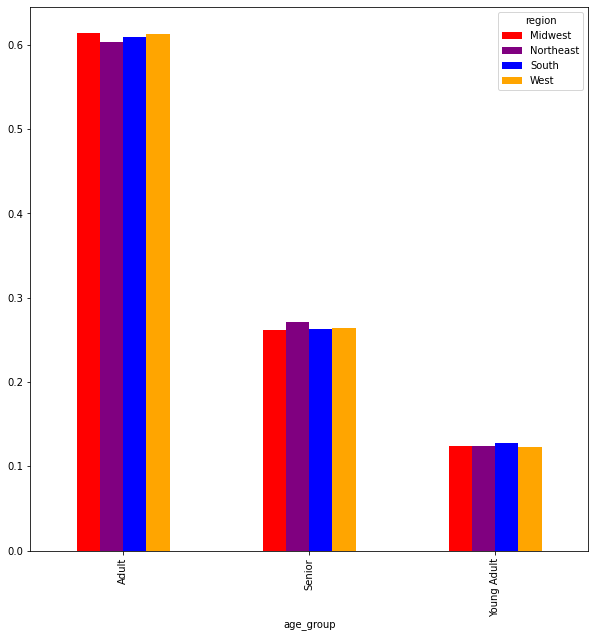

In [62]:
# creating bar chart of age group and region
work_reg_bar = age_reg.plot(kind = 'bar', color=['red', 'purple', 'blue', 'orange'], figsize=(10,10))

In [63]:
# Exporting chart
work_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'work_reg_bar.png'))

### income and region comparison

In [64]:
# creating crosstab of income group and region
income_reg = pd.crosstab(df2['income_group'], df2['region'], normalize = 'columns')

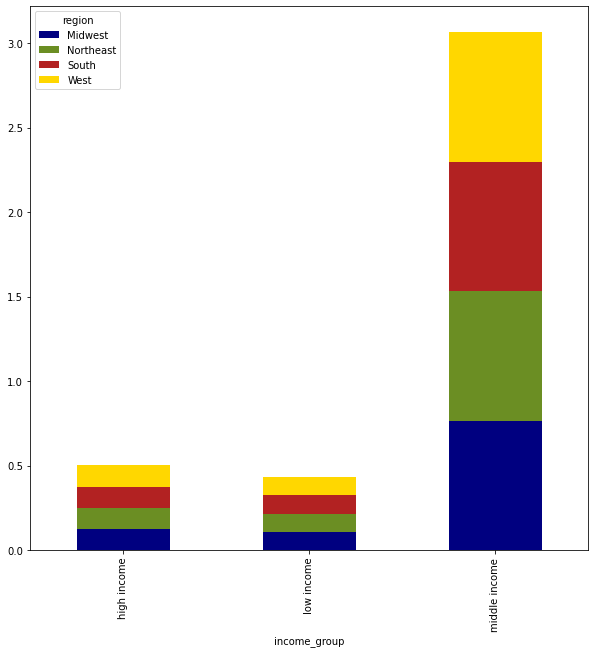

In [65]:
# creating bar chart of income group and region
income_reg_bar = income_reg.plot(kind = 'bar', stacked = True, color=['navy','olivedrab', 'firebrick', 'gold'], figsize=(10,10))

In [66]:
# Exporting chart
income_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_reg_bar.png'))

### Alcohol and region comparison

In [67]:
# creating crosstab of alcohol consumer and region
alcohol_reg = pd.crosstab(df2['alcohol_consumer'], df2['region'], normalize = 'columns')

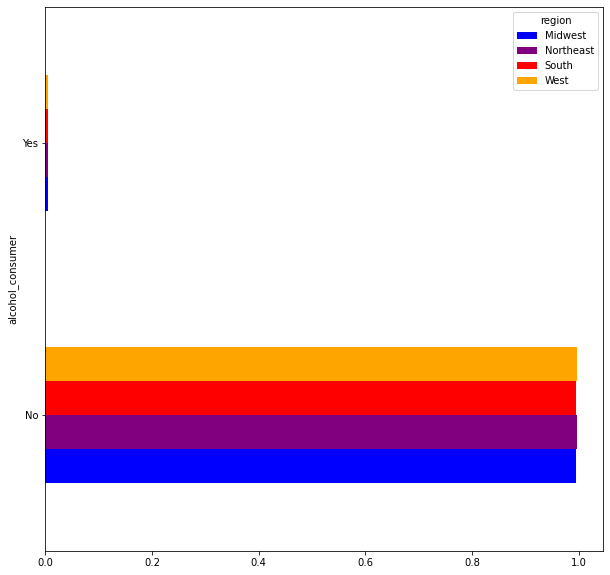

In [68]:
# creating bar chart of alcohol consumer and region
alcohol_reg_bar = alcohol_reg.plot(kind = 'barh', color=['blue','purple', 'red', 'orange'], figsize=(10,10))

In [69]:
# Exporting chart
alcohol_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_reg_bar.png'))

### family and region comparison

In [70]:
# creating crosstab of family size and region
fam_reg = pd.crosstab(df2['family_size'], df2['region'], normalize = 'columns')

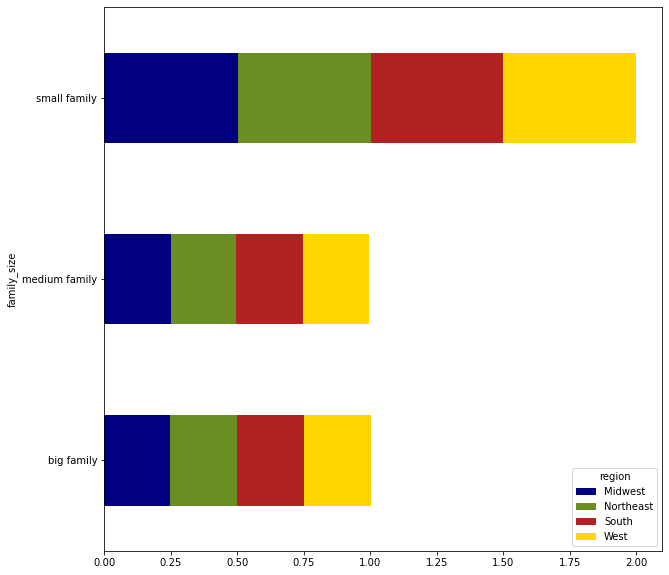

In [71]:
# creating bar chart of family size and region
fam_reg_bar = fam_reg.plot(kind = 'barh', stacked = True, color=['navy','olivedrab', 'firebrick', 'gold'], figsize=(10,10))

In [72]:
# Exporting chart
fam_reg_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_reg_bar.png'))